# Analisamos los datos obtenidos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_users = pd.read_csv("data/user_0bots.csv")
all_users

,id,name,screen_name,location,description,url_imagen,bot
0,54285367,Viva Aguascalientes,Aguascalientes,Aguascalientes,Cuenta Oficial de la Secretaría de Turismo del...,http://pbs.twimg.com/profile_images/1582058481...,1.0
1,14181882,Gobierno del Estado de Aguascalientes,GobAgs,Aguascalientes,Twitter oficial del Gobierno del Estado de Agu...,http://pbs.twimg.com/profile_images/1585636391...,1.0
2,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0.0
3,486085886,RielerosDeAgs,RielerosDeAgs,Aguascalientes,Twitter Oficial del Club de Béisbol Rieleros d...,http://pbs.twimg.com/profile_images/1582761994...,1.0
4,120936992,IEE Aguascalientes,IEEAGS,Aguascalientes,Somos un organismo público autónomo.\n\nOrgani...,http://pbs.twimg.com/profile_images/1557058443...,1.0
...,...,...,...,...,...,...,...
21215,38458517,Earthgonomic Mexico,Earthgonomic,Mexico,Impulsamos el desarrollo de la sociedad en arm...,http://pbs.twimg.com/profile_images/1235711682...,1.0
21216,1686920569,petcomexico,PetcoMexico,Mexico,Comprometidos con mejorar la salud y el bienes...,http://pbs.twimg.com/profile_images/1345027354...,1.0
21217,151075888,Revista Selecciones México,selecciones_mx,Mexico,"Salud, alimentación, hogar, ciencia, tecnologí...",http://pbs.twimg.com/profile_images/1578164997...,1.0
21218,97787419,Deloitte México,DeloitteMX,Mexico,Compartimos perspectivas y contenidos exclusiv...,http://pbs.twimg.com/profile_images/7430924556...,1.0


Vamos a ver cuantas cuentas de twitter segun botometer son bots, cuantas no.

Error siginifica que no se pueden obtener los tweets en esa cuenta por lo que no es posible predicir si es bot o no.

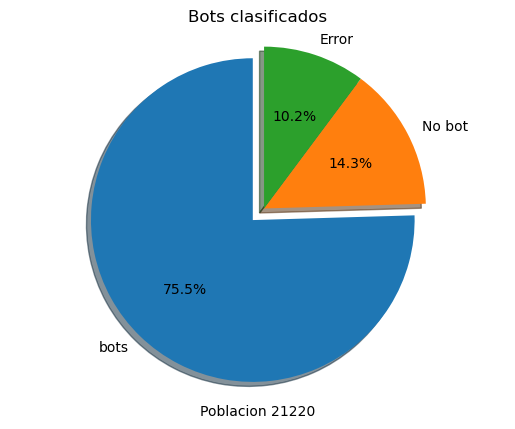

In [16]:
values = all_users['bot'].value_counts()
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0) 
ax1.set_title('Bots clasificados')
ax1.set_xlabel('Poblacion {}'.format(values.sum()))
ax1.pie(values, explode=explode, labels=[ 'bots','No bot','Error'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Ahora descargamos las imagenes de los usuarios, con download_Image de la clase My_twitter.

Una vez descargado dividimos usamos el modelo_vgg98.h5 para identificar si hay personas en las fotos y separarlas por carpeta.

Como las imagenes se separaron por capeta solo viendo el numero de archivos en cada una se pude ver cuantas imagenes hay en cada una.

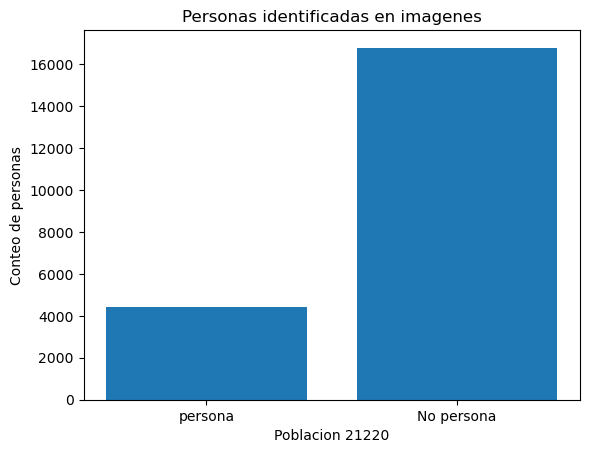

In [17]:
plt.ylabel('Conteo de personas')
plt.xlabel('Poblacion {}'.format(values.sum()))
plt.bar(['persona','No persona'], [4436,16784])
plt.title('Personas identificadas en imagenes')
plt.show()

En la carpeta que solo tiene personas segun el modelo_vgg98.h5 creamos un nuevo data frame con 4431 filas.

In [18]:
users_humans = pd.read_csv('data/user_human_gender.csv')
users_humans

,id,name,screen_name,location,description,url_imagen,bot,gender
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0.0,1
1,527774623,Aguascalientes Hoy,AgsHoy,Aguascalientes,"Aguascalientes Hoy. Noticias, comentarios, fot...",http://pbs.twimg.com/profile_images/2427792998...,1.0,-1
2,1366163144004009992,Jacob y laura pareja de aguascalientes de 31 y 27,Jacob11228870,Aguascalientes,buscamos parejas de AGuascalientes buscamos In...,http://pbs.twimg.com/profile_images/1442167525...,1.0,-1
3,1156102355642978307,aportes de packs Aguascalientes y más,HidropacksAgs,Aguascalientes,😎😎,http://pbs.twimg.com/profile_images/1269105096...,1.0,-1
4,807112649834188800,packs de AGUASCALIENTES,simonsanzon,Aguascalientes,aquí se suben packs de aguascalientes y otros ...,http://pbs.twimg.com/profile_images/1248528021...,1.0,-1
...,...,...,...,...,...,...,...,...
4426,566786349,One Direction Mexico,Oficial1DMex,Mexico,Escribiendo sobre los 1D y aveces sobre mi vida!,http://pbs.twimg.com/profile_images/8777195502...,0.0,-1
4427,2908748885,Louis T. México 🇲🇽,LouisMxOficial,Mexico,Fan Club mexicano #1 dedicado a promocionar y ...,http://pbs.twimg.com/profile_images/1580683007...,0.0,1
4428,464393131,ALL STARS MÉXICO,InfluencerFC,Mexico,"Equipo de talentos, digitales y offline. 😎",http://pbs.twimg.com/profile_images/1370804208...,0.0,-1
4429,95974543,fabiolajornada,FabiolaMexicoDF,Mexico,Periodista UNAM La Jornada,http://pbs.twimg.com/profile_images/8370869335...,0.0,-1


Por ejemplo cuantos de los que tiene error, no bots o bots, usan imagenes con fotos de personas reales.

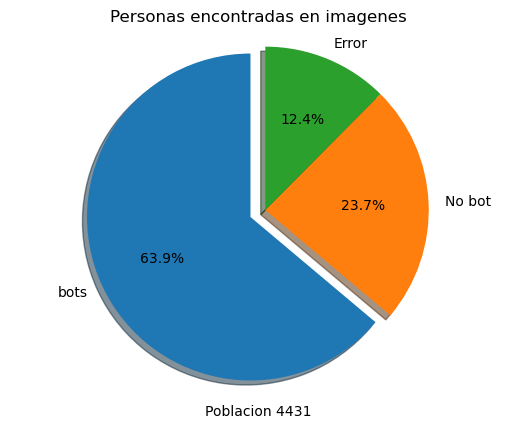

In [19]:
values = users_humans['bot'].value_counts()
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0) 
ax1.set_title('Personas encontradas en imagenes')
ax1.set_xlabel('Poblacion {}'.format(values.sum()))
ax1.pie(values, explode=explode, labels=[ 'bots','No bot','Error'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

De todos las imagenes donde se encontraron personas cuantas son hombre y mujeres incluyendo los bots y no bots.

Tambien de solo bots, cuantos son hombre y mujeres

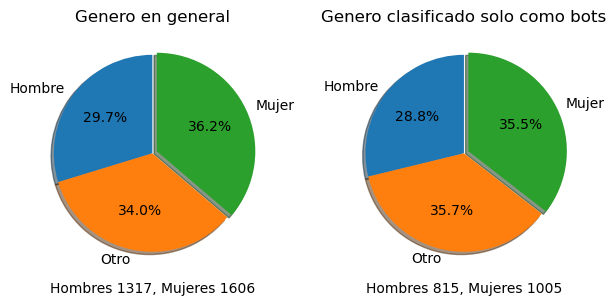

In [20]:
values = users_humans['gender'].value_counts()
values2 = users_humans[users_humans['bot'] == 1]['gender'].value_counts()
num_poblacion = values.sum()
fig1, ax = plt.subplots(1,2)
explode = (0, 0, 0.05) 

ax[0].set_title('Genero en general')
ax[0].set_xlabel('Hombres {}, Mujeres {}'.format(values[1],values[0]))
ax[0].pie([values[1],values[-1],values[0]], explode=explode, labels=['Hombre','Otro','Mujer'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax[1].set_title('Genero clasificado solo como bots')
ax[1].set_xlabel('Hombres {}, Mujeres {}'.format(values2[1],values2[0]))
ax[1].pie([values2[1],values2[-1],values2[0]], explode=explode, labels=['Hombre','Otro','Mujer'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Con estos datos descartamos los que se clasifican como bots y los que dan error. Por lo que se crea otro data frame, el cual usando la clase Detector, predecimos el genero de la persona que estan dentro de la foto de perfil

In [21]:
gender_by_img = pd.read_csv('data/user_gender_0bots.csv')
gender_by_img

,id,name,screen_name,location,description,url_imagen,bot,gender
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0.0,1
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0.0,-1
2,891111621212295168,Oso Carpintero Aguascalientes,oso_carpintero,Aguascalientes,🔨🐻🔨,http://pbs.twimg.com/profile_images/1273304233...,0.0,-1
3,222362926,Mireya Cuéllar,mireya_cuellar,Baja California,Periodista: directora de La Jornada Baja Calif...,http://pbs.twimg.com/profile_images/5569988187...,0.0,1
4,243990516,javier plascencia,JavPlascencia,Baja California,"cocinero norteno amante del mar ,baja californ...",http://pbs.twimg.com/profile_images/7710531698...,0.0,0
...,...,...,...,...,...,...,...,...
1045,566786349,One Direction Mexico,Oficial1DMex,Mexico,Escribiendo sobre los 1D y aveces sobre mi vida!,http://pbs.twimg.com/profile_images/8777195502...,0.0,-1
1046,2908748885,Louis T. México 🇲🇽,LouisMxOficial,Mexico,Fan Club mexicano #1 dedicado a promocionar y ...,http://pbs.twimg.com/profile_images/1580683007...,0.0,1
1047,464393131,ALL STARS MÉXICO,InfluencerFC,Mexico,"Equipo de talentos, digitales y offline. 😎",http://pbs.twimg.com/profile_images/1370804208...,0.0,-1
1048,95974543,fabiolajornada,FabiolaMexicoDF,Mexico,Periodista UNAM La Jornada,http://pbs.twimg.com/profile_images/8370869335...,0.0,-1


Por ejemplo se predice como 0 a la mujer, 1 al hombre, -1 si hubo algun error (no se reconoce la persona, hay muchas personas, etc)

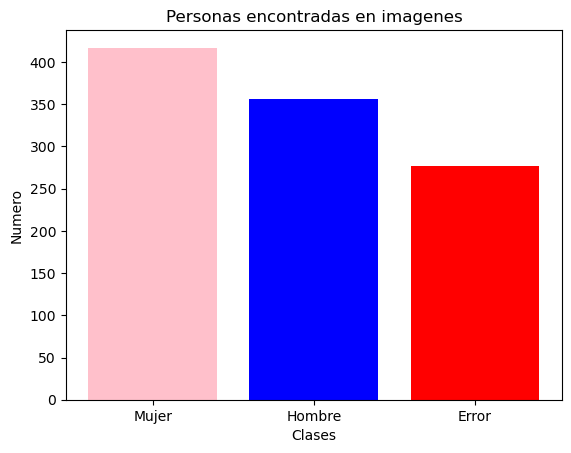

In [9]:
values = gender_by_img['gender'].value_counts()
plt.bar(['Mujer','Hombre','Error'], [values[0],values[1],values[-1]],color = ['pink','blue','red'])
plt.title('Personas encontradas en imagenes')
plt.ylabel('Numero')
plt.xlabel('Clases')
plt.show()

Ya que tenemos un dataset mas pequeño podemos clasificar a mano el genero 1050 usuarios en total.

In [22]:
me_vs_model = pd.read_csv('data/users_by_me.csv')
me_vs_model.head(2)

,id,name,screen_name,location,description,url_imagen,bot,gender,gender_by_human,url_prof
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0,1,1,https://twitter.com/MartinOrozcoAgs
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0,-1,1,https://twitter.com/FHerreraAvila


Comparando los datos que el modelo nos dio contra los que una persona clasifica a mano(viendo la foto, perfil, descripcion, twetts,etc).

"Otro" significa que la persona no se pudo identificar o es un club de fan, partido politico, empresa, etc

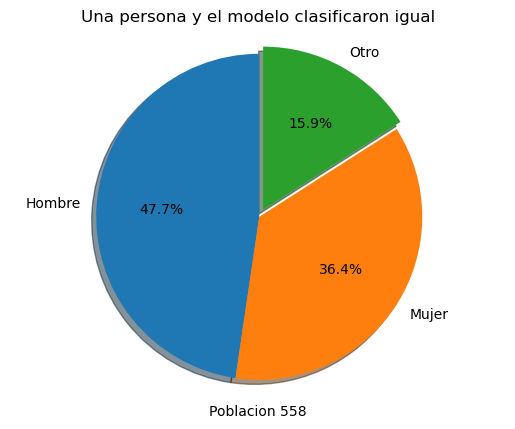

In [23]:
values = me_vs_model[me_vs_model['gender']== me_vs_model['gender_by_human']]['gender'].value_counts()
num_poblacion = values.sum()
fig1, ax1 = plt.subplots()
explode = (0, 0, 0.05) 
ax1.set_title('Una persona y el modelo clasificaron igual')
ax1.set_xlabel('Poblacion {}'.format(num_poblacion))
ax1.pie([values[1],values[0],values[-1]], explode=explode, labels=['Hombre','Mujer','Otro'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Quiere decir que en 558 usuarios de 1050, Una persona y el modelo clasificaron igual.

Para ver un poco la proporcion por de personas por estado vemos la siguiente grafica

In [12]:
df = me_vs_model[me_vs_model['gender_by_human'] != -1]

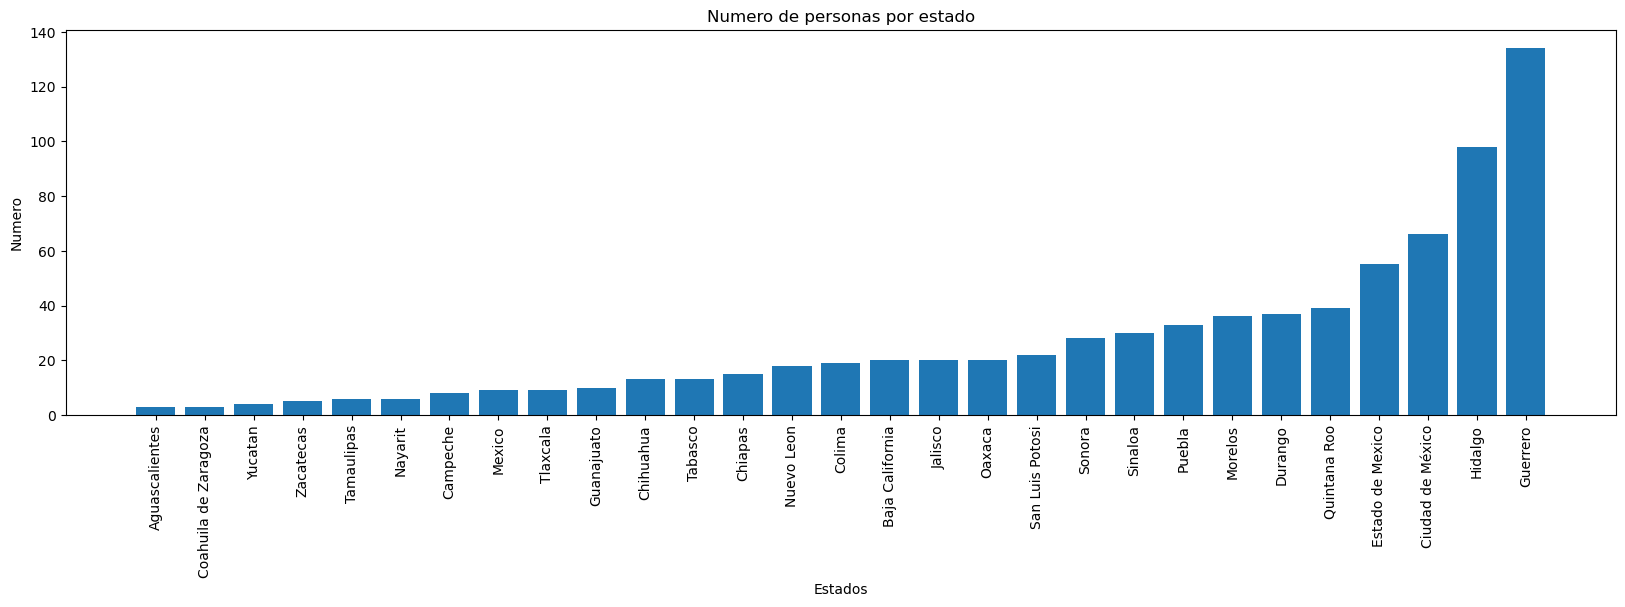

In [13]:
values = df['location'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(20,5))
plt.bar(values.index, values)
plt.title('Numero de personas por estado')
plt.ylabel('Numero')
plt.xlabel('Estados')
plt.xticks(rotation = 90)
plt.show()

Con esto ya puedo empezar con un clasificador de texto, pues ya estan clasificados a mano los usuarios ya no dependeria de lo que diga el modelo que predice por imagen.


Usando este nuevo clasificador, la API que predice el genero por el nombre y el modelo que predice por imagen, creamos una nueva funcion que engloba las 3. Comparamos las predecciones los tres  con el dataset que nosotros tambien predecimos, vemos la efectividad del modelo.

In [14]:
df_final = pd.read_csv('./data/user_final.csv')
df_final = df_final[df_final['gender_by_human'] != -1] 
df_final

,id,name,screen_name,location,description,url_imagen,bot,gender,gender_by_human,url_prof,final_gender
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0,1,1,https://twitter.com/MartinOrozcoAgs,1.0
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0,-1,1,https://twitter.com/FHerreraAvila,1.0
2,891111621212295168,Oso Carpintero Aguascalientes,oso_carpintero,Aguascalientes,🔨🐻🔨,http://pbs.twimg.com/profile_images/1273304233...,0,-1,1,https://twitter.com/oso_carpintero,1.0
3,222362926,Mireya Cuéllar,mireya_cuellar,Baja California,Periodista: directora de La Jornada Baja Calif...,http://pbs.twimg.com/profile_images/5569988187...,0,1,0,https://twitter.com/mireya_cuellar,0.0
4,243990516,javier plascencia,JavPlascencia,Baja California,"cocinero norteno amante del mar ,baja californ...",http://pbs.twimg.com/profile_images/7710531698...,0,0,1,https://twitter.com/JavPlascencia,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1028,175463754,Gerardo Islas,gerislas,Mexico,Soy el Presidente Nacional del partido “Fuerza...,http://pbs.twimg.com/profile_images/1397388920...,0,1,1,https://twitter.com/gerislas,1.0
1029,87024989,Carlos Quesnel,quesnelc,Mexico,Cónsul de México en Portland/Consul of Mexico ...,http://pbs.twimg.com/profile_images/1323386867...,0,-1,1,https://twitter.com/quesnelc,1.0
1030,225210710,X Baalam Ko'olel,Mayusa25,Mexico,"🍀Mujer Mayahablante, 🇲🇽 ex Dip. Federal, Capac...",http://pbs.twimg.com/profile_images/1537575228...,0,0,0,https://twitter.com/Mayusa25,1.0
1032,136036586,Zuleyma Huidobro,ZuleymaHuidobro,Mexico,Directora General de Asuntos Jurídicos en el S...,http://pbs.twimg.com/profile_images/1310376191...,0,0,0,https://twitter.com/ZuleymaHuidobro,0.0


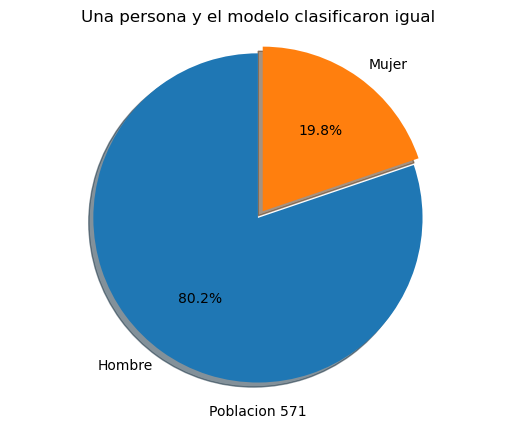

In [15]:
values = df_final[df_final['final_gender']== df_final['gender_by_human']]['gender_by_human'].value_counts()
num_poblacion = values.sum()
fig1, ax1 = plt.subplots()
explode = (0, 0.05) 
ax1.set_title('Una persona y el modelo clasificaron igual')
ax1.set_xlabel('Poblacion {}'.format(num_poblacion))
ax1.pie([values[1],values[0]], explode=explode, labels=['Hombre','Mujer'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Con esto nos damos cuenta la union de los modelos tiene un 73% de efectividad.

### Otros procesos que se hicieron
(codigo revuelto)
Eliminamos los usuarios que esten desabilitados, regularmente son los que no tienen name ni description

In [12]:
#df = df[~df['name'].isna()]
#df.to_csv('user_bots.csv', index= False)
#verificamos que todos tengan imagen para descargar 
users[users['description'].isna()]

,id,name,screen_name,location,description,url_imagen,bot
39,918550187395682305,Tribunal Electoral del Estado de Aguascalientes,TriEE_Ags,Aguascalientes,NaN,http://pbs.twimg.com/profile_images/1585275674...,1.0
51,1055840820862042112,Instituto del Deporte del Estado de Aguascalie...,ideaags,Aguascalientes,NaN,http://pbs.twimg.com/profile_images/1585008798...,1.0
53,131305422,UNID Aguascalientes.,UNID_Ags,Aguascalientes,NaN,http://pbs.twimg.com/profile_images/7732079769...,1.0
58,324980889,SEP Aguascalientes,SEP_Ags,Aguascalientes,NaN,http://pbs.twimg.com/profile_images/3221630106...,1.0
61,238243448,Aguascalientes CNC,CNC_Ags,Aguascalientes,NaN,http://pbs.twimg.com/profile_images/6739365762...,1.0
...,...,...,...,...,...,...,...
21005,94953824,EMIMusic,EMIMexico,Mexico,NaN,http://pbs.twimg.com/profile_images/1665046179...,-1.0
21089,240029688,Sally México,SallyMexico,Mexico,NaN,http://pbs.twimg.com/profile_images/1225146808...,-1.0
21099,1310611176842301440,SíPorMéxico,SiPorMx,Mexico,NaN,http://pbs.twimg.com/profile_images/1545117481...,-1.0
21135,1031648230780612608,México Libre,MexLibre_,Mexico,NaN,http://pbs.twimg.com/profile_images/1311817905...,-1.0


Descarga de todas las imagenes. con espera de 15 min. por restrigciones de la API de twitter

In [ ]:
import time
path = r"C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\imagenesRandom"
n = 0
eliminar = []
for i in df.index:
    id = df['id'][i]
    url = df['url_imagen'][i]
    x = tw.download_Image(url,id,path)
    if x == 1 or x == 0:
        n += x
    else:
        eliminar.append(x)
        n += 1
    if n >= 299:
        n = 0
        print("Esperado por 15 min")
        time.sleep(960)
        

Una vez descargado dividimos usamos el modelo_vgg98.h5 para identificar si hay personas en las fotos y separarlas por carpeta

In [ ]:
from pathlib import Path
import shutil
from detector import Detector
dect = Detector()
path = Path('../imagenesRandom/')
filenames = list(map(lambda x: x.name, path.glob('*')))
human = []
path_human = r'C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\human/'
path_no_human = r'C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\nohuman/'
no_human = []
source =  r'C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\imagenesRandom/'
for filename in filenames:
    p = dect.detectar_persona('../imagenesRandom/'+filename)
    if p:
        id = filename[:-4] if 'jpeg' != filename[-4:] else filename[:-5]
        human.append(id)
        shutil.copyfile(source+filename,path_human+filename) 
    else:
        id = filename[:-4] if 'jpeg' != filename[-4:] else filename[:-5]
        no_human.append(id)
        shutil.copyfile(source+filename,path_no_human+filename)

Para verificar si las cuentas son bots o no usando botometer y cambiando de ambiente con botometer y tweepy.

In [41]:
# !pip install botometer

  Using cached botometer-1.6.1-py3-none-any.whl (4.8 kB)
  Using cached tweepy-3.10.0-py2.py3-none-any.whl (30 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [4]:
import time 
def verificar_bots(data):
    '''
    Verifica 2000 usuarios del dataset no sean bots.
    1 es bot, 0 no es bot, 2 error al calcular.
    param: data, dataFrame con los datos
    return: dataframe, con datos ya calculados
    '''
    
    df1 = data.copy()
    datos = df1[['screen_name','bot']] # usuarios que ya han sido verificados
    n = 0
    reqs = 0
    boto = []
    id = 0
    last = 0
    for i in datos.index:
        if int(datos.iloc[i].bot) != -1:
            continue
        id = datos.iloc[i].screen_name
        if reqs >= 1999:
            break
        reqs += 1
        bot = -2
        try:
            bot = tw.es_bot(id)
        except Exception as e: #error
            if 'Not authorized.' == str(e):
                bot = -2
                n += 1
                df1.at[i,'bot']= bot
                continue
            if 'has no tweets in timeline' in str(e):
                bot = -2
                n += 1
                df1.at[i,'bot']= bot
                continue
            if 'Sorry, that page does not exist.' in str(e):
                bot = -2
                n += 1
                df1.at[i,'bot']= bot
                continue
            #hacemos break para ver si hay algun error por parte de la API de twitter 
            print(e)
            print('id: {}'.format(id))
            print('ultimo index: {}'.format(i))
            print('min reqs = {}'.format(n))
            boto.append(id)
            break
        n += 1
        df1.at[i,'bot']= bot
        #if n >= 899:
           # n = 0
            #print("Esperado por 15 min")
            #break
            #time.sleep(960)
    df1.to_csv('user_bots1.csv', index= False)
    return df1,boto

In [5]:
new_bots, erros = verificar_bots(aqui va dataset)

Para detectar el genero, obtenmos el id, luego la cargamos la imagen, despues ejecutamos el modelo y guardamos.


In [57]:

df

,id,name,screen_name,location,description,url_imagen,bot
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0.0
1,527774623,Aguascalientes Hoy,AgsHoy,Aguascalientes,"Aguascalientes Hoy. Noticias, comentarios, fot...",http://pbs.twimg.com/profile_images/2427792998...,1.0
2,1366163144004009992,Jacob y laura pareja de aguascalientes de 31 y 27,Jacob11228870,Aguascalientes,buscamos parejas de AGuascalientes buscamos In...,http://pbs.twimg.com/profile_images/1442167525...,1.0
3,1156102355642978307,aportes de packs Aguascalientes y más,HidropacksAgs,Aguascalientes,😎😎,http://pbs.twimg.com/profile_images/1269105096...,1.0
4,807112649834188800,packs de AGUASCALIENTES,simonsanzon,Aguascalientes,aquí se suben packs de aguascalientes y otros ...,http://pbs.twimg.com/profile_images/1248528021...,1.0
...,...,...,...,...,...,...,...
4426,566786349,One Direction Mexico,Oficial1DMex,Mexico,Escribiendo sobre los 1D y aveces sobre mi vida!,http://pbs.twimg.com/profile_images/8777195502...,0.0
4427,2908748885,Louis T. México 🇲🇽,LouisMxOficial,Mexico,Fan Club mexicano #1 dedicado a promocionar y ...,http://pbs.twimg.com/profile_images/1580683007...,0.0
4428,464393131,ALL STARS MÉXICO,InfluencerFC,Mexico,"Equipo de talentos, digitales y offline. 😎",http://pbs.twimg.com/profile_images/1370804208...,0.0
4429,95974543,fabiolajornada,FabiolaMexicoDF,Mexico,Periodista UNAM La Jornada,http://pbs.twimg.com/profile_images/8370869335...,0.0


In [58]:
from Twitter.detector import Detector
dect = Detector(weights= r'C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\Twitter\weights', #ruta a la Capeta weitghts
                person=r"C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\models\modelo_vgg98.h5", #ruta al archivo  modelo_vgg98.h5
                text=r"C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\models\modelo_text.h5",     #ruta al archiv modelo_text.h5
                tokenizer= r"C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\models\tokenizer.json" ) # ruta al tokenizer.json

df = pd.read_csv('./data/user_human_v1.csv')
                
from pathlib import Path 
path_human = Path(r'C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\human/')
gender = []
for filename in df['id']:
    #print(filename)
    p = list(path_human.glob(str(filename)+'*g'))[0]
    r = dect.detectar_genero_foto(str(p))
    gender.append(r)

df['gender'] = gender
df.to_csv('user_final.csv',index=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:

from Twitter.my_twitter import My_Twitter

tw = My_Twitter(r"C:\Users\monch\Documents\sevicio\Deteccion_de_Genero\Twitter\config.ini") #ruta al archivo config.init donde estan los tokens de twitter



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import pandas as pd
df = pd.read_csv('user_final.csv')
df

,id,name,screen_name,location,description,url_imagen,bot,gender,gender_by_human,url_prof,final_gender
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0,1,1,https://twitter.com/MartinOrozcoAgs,1.0
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0,-1,1,https://twitter.com/FHerreraAvila,1.0
2,891111621212295168,Oso Carpintero Aguascalientes,oso_carpintero,Aguascalientes,🔨🐻🔨,http://pbs.twimg.com/profile_images/1273304233...,0,-1,1,https://twitter.com/oso_carpintero,1.0
3,222362926,Mireya Cuéllar,mireya_cuellar,Baja California,Periodista: directora de La Jornada Baja Calif...,http://pbs.twimg.com/profile_images/5569988187...,0,1,0,https://twitter.com/mireya_cuellar,0.0
4,243990516,javier plascencia,JavPlascencia,Baja California,"cocinero norteno amante del mar ,baja californ...",http://pbs.twimg.com/profile_images/7710531698...,0,0,1,https://twitter.com/JavPlascencia,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1045,566786349,One Direction Mexico,Oficial1DMex,Mexico,Escribiendo sobre los 1D y aveces sobre mi vida!,http://pbs.twimg.com/profile_images/8777195502...,0,-1,-1,https://twitter.com/Oficial1DMex,-1.0
1046,2908748885,Louis T. México 🇲🇽,LouisMxOficial,Mexico,Fan Club mexicano #1 dedicado a promocionar y ...,http://pbs.twimg.com/profile_images/1580683007...,0,1,-1,https://twitter.com/LouisMxOficial,-1.0
1047,464393131,ALL STARS MÉXICO,InfluencerFC,Mexico,"Equipo de talentos, digitales y offline. 😎",http://pbs.twimg.com/profile_images/1370804208...,0,-1,-1,https://twitter.com/InfluencerFC,-1.0
1048,95974543,fabiolajornada,FabiolaMexicoDF,Mexico,Periodista UNAM La Jornada,http://pbs.twimg.com/profile_images/8370869335...,0,-1,0,https://twitter.com/FabiolaMexicoDF,-1.0


In [25]:
#Predecir con la funcion global
import time
n = 0
g = -1
lst  = []
error = []
for i in df.index:
    name = df.iloc[i].screen_name
    if df.iloc[i].final_gender != -1:
        continue
    try:
        data_user = tw.get_user_data(username=name) #random person
        n+=1
    except Exception as e:
        error.append((i,str(e)))
        data_user = -1
    try:
        if data_user != -1:
            g = dect.detectar_genero(data_user, verbose=False)
        else:
            g = -1
    except Exception as e:
        error.append((i,str(e)))
        g = -1
    
    df.at[i,'final_gender']= g
    #lst.append(g)
    if n >= 299:
        n = 0
        print("Esperado por 15 min")
        time.sleep(930)

1/1 [==============================] - 1s 880ms/step


In [29]:
df['final_gender'].value_counts()

 1.0    854
 0.0    176
-1.0     20
Name: final_gender, dtype: int64

In [30]:
df.to_csv('user_final.csv',index=False)